In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sklearn import linear_model
import statsmodels.api as sm
from scipy.stats import bartlett
from scipy.stats import levene

In [80]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

data = pd.read_sql_query('select * from weatherinszeged', con=engine)

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   date                 96453 non-null  datetime64[ns, UTC]
 1   summary              96453 non-null  object             
 2   preciptype           96453 non-null  object             
 3   temperature          96453 non-null  float64            
 4   apparenttemperature  96453 non-null  float64            
 5   humidity             96453 non-null  float64            
 6   windspeed            96453 non-null  float64            
 7   windbearing          96453 non-null  float64            
 8   visibility           96453 non-null  float64            
 9   loudcover            96453 non-null  float64            
 10  pressure             96453 non-null  float64            
 11  dailysummary         96453 non-null  object             
dtypes: datetime64[ns, 

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [93]:
Y = data['temperature']
X = data[['humidity', 'windspeed', 'windbearing', 'pressure']]
lm = linear_model.LinearRegression()
lm.fit(X,Y)
print('Coefficients are {}'.format(lm.coef_))
print('Intercepts are {}'.format(lm.intercept_))

Coefficients are [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]
Intercepts are 37.92643818528538


In [82]:
X = sm.add_constant(X)
results = sm.OLS(Y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Tue, 28 Apr 2020   Prob (F-statistic):               0.00
Time:                        19:19:13   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.9264      0.233    162.709      0.000      37.470      38.383
humidity      -32.4962      0.123   -264.288      0.000     -32.737     -32.255
windspeed      -0.2014      0.003    -57.557      0.000      -0.208      -0.195
windbearing     0.0040      0.000     18.463      0.000       0.004       0.004
pressure       -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

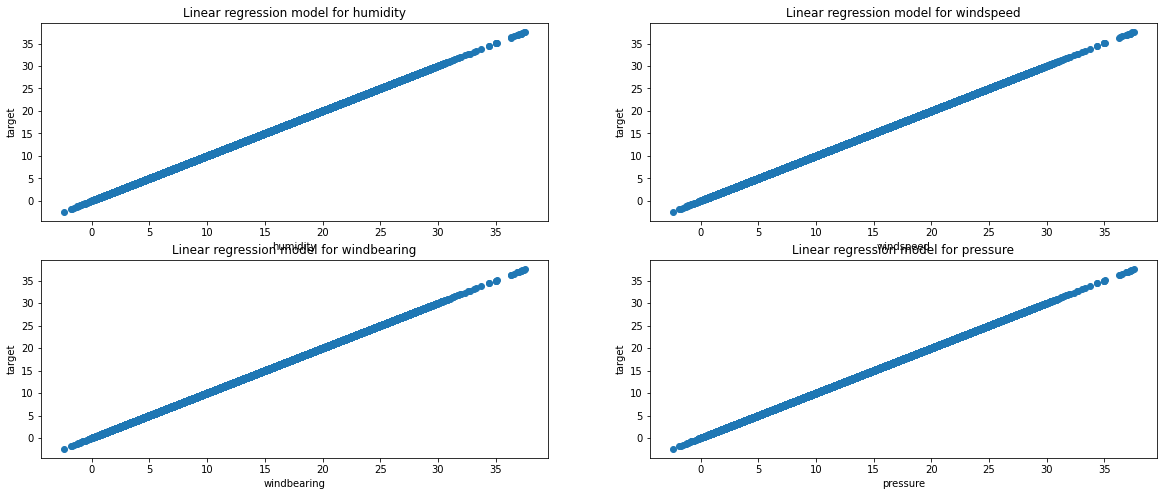

In [0]:
X = data[['humidity', 'windspeed', 'windbearing', 'pressure']]
linear_test = pd.DataFrame()

linear_test['test'] = data['humidity']*-32.4962 + data['windbearing']*.004 + data['pressure']*-.0007 + data['windspeed']*-.2014 + 37.9264
predictions = lm.predict(X)

plt.figure(figsize=(20,8))
x = 1
for col in X:
  plt.subplot(2,2,x)
  plt.scatter(linear_test['test'], predictions)
  plt.xlabel(col)
  plt.ylabel('target')
  plt.title('Linear regression model for {}'.format(col))
  x = x + 1

In [0]:
errors = Y - predictions
print('Mean of the errors for the model is: {}'.format(np.mean(errors)))

Mean of the errors for the model is: -3.732130268532674e-15


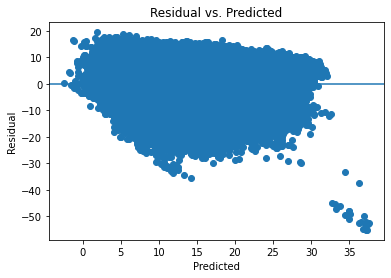

Bartlett test results are : 2464.844656867369, with a pvalue of 0.0
Levene test results are: 2321.2401008574006, witha  pvalue of 0.0


In [45]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print('Bartlett test results are : {}, with a pvalue of {}'.format(bart_stats[0], bart_stats[1]))
print('Levene test results are: {}, witha  pvalue of {}'.format(lev_stats[0], lev_stats[1]))
#Based on test results errors are heterodscedastic

In [47]:
X.corr()
# None of the values are strongly correlated with any other

,humidity,windspeed,windbearing,pressure
humidity,1.000000,-0.224951,0.000735,0.005454
windspeed,-0.224951,1.000000,0.103822,-0.049263
windbearing,0.000735,0.103822,1.000000,-0.011651
pressure,0.005454,-0.049263,-0.011651,1.000000


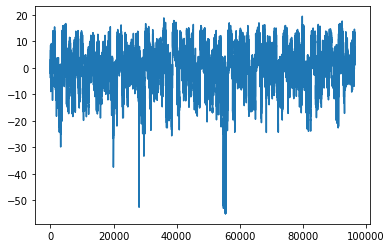

In [53]:
plt.plot(errors)

#Errors seem to be uncorrelated. Will test with auto correlation tool



/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


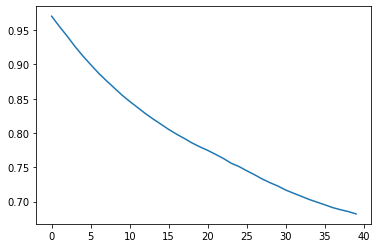

In [56]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()
# In actuallity the errors are correlated
data['errors'] = errors

In [58]:
data.corr()

# it seems that some features are correlated with the errors particularly temperature and apparent temp

,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,errors
temperature,1.000000,0.992629,-6.322547e-01,8.956968e-03,2.998820e-02,0.392847,NaN,-5.447106e-03,7.611978e-01
apparenttemperature,0.992629,1.000000,-6.025710e-01,-5.664970e-02,2.903052e-02,0.381718,NaN,-2.189998e-04,7.649979e-01
humidity,-0.632255,-0.602571,1.000000e+00,-2.249515e-01,7.346454e-04,-0.369173,NaN,5.454263e-03,-1.935763e-16
windspeed,0.008957,-0.056650,-2.249515e-01,1.000000e+00,1.038215e-01,0.100749,NaN,-4.926281e-02,-3.912914e-17
windbearing,0.029988,0.029031,7.346454e-04,1.038215e-01,1.000000e+00,0.047594,NaN,-1.165088e-02,-2.293671e-16
visibility,0.392847,0.381718,-3.691725e-01,1.007493e-01,4.759418e-02,1.000000,NaN,5.981838e-02,2.106702e-01
loudcover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pressure,-0.005447,-0.000219,5.454263e-03,-4.926281e-02,-1.165088e-02,0.059818,NaN,1.000000e+00,-7.998021e-16
errors,0.761198,0.764998,-1.935763e-16,-3.912914e-17,-2.293671e-16,0.210670,NaN,-7.998021e-16,1.000000e+00


In [83]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

houseprice_data = pd.read_sql_query('select * from houseprices', con=engine)

engine.dispose()

houseprice_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

In [84]:
  non_numeric = houseprice_data.select_dtypes(['object']).columns
  numeric = houseprice_data.select_dtypes(['int64', 'float64']).columns
  houseprice_data[numeric].corr().loc['saleprice'].sort_values(ascending = False)

saleprice        1.000000
overallqual      0.790982
grlivarea        0.708624
garagecars       0.640409
garagearea       0.623431
totalbsmtsf      0.613581
firstflrsf       0.605852
fullbath         0.560664
totrmsabvgrd     0.533723
yearbuilt        0.522897
yearremodadd     0.507101
garageyrblt      0.486362
masvnrarea       0.477493
fireplaces       0.466929
bsmtfinsf1       0.386420
lotfrontage      0.351799
wooddecksf       0.324413
secondflrsf      0.319334
openporchsf      0.315856
halfbath         0.284108
lotarea          0.263843
bsmtfullbath     0.227122
bsmtunfsf        0.214479
bedroomabvgr     0.168213
screenporch      0.111447
poolarea         0.092404
mosold           0.046432
threessnporch    0.044584
bsmtfinsf2      -0.011378
bsmthalfbath    -0.016844
miscval         -0.021190
id              -0.021917
lowqualfinsf    -0.025606
yrsold          -0.028923
overallcond     -0.077856
mssubclass      -0.084284
enclosedporch   -0.128578
kitchenabvgr    -0.135907
Name: salepr

In [0]:
ms_zoning_dummies = pd.get_dummies(houseprice_data['mszoning'], drop_first=True)
street_dummies = pd.get_dummies(houseprice_data['street'], drop_first= True)
houseprice_data = pd.concat([houseprice_data, ms_zoning_dummies, street_dummies], axis=1)

In [88]:
houseprice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 86 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

In [101]:
X = houseprice_data[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf', 'FV', 'RH','RL', 'RM', 'Pave' ]]
Y = houseprice_data.saleprice

lrm_2 = linear_model.LinearRegression()
lrm_2.fit(X,Y)

print('The coefficients are: {}'.format(lrm_2.coef_))
print('The intercept is: {}'.format(lrm_2.intercept_))

The coefficients are: [2.33265353e+04 4.56343565e+01 1.34501364e+04 1.64082048e+01
 2.83816393e+01 2.50875137e+04 1.34204564e+04 2.85658560e+04
 9.04778936e+03 1.51037622e+02]
The intercept is: -117337.72871399377


In [103]:
X = sm.add_constant(X)
results = sm.OLS(Y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     482.0
Date:                Tue, 28 Apr 2020   Prob (F-statistic):               0.00
Time:                        19:26:18   Log-Likelihood:                -17475.
No. Observations:                1460   AIC:                         3.497e+04
Df Residuals:                    1449   BIC:                         3.503e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.173e+05    1.8e+04     -6.502      0.000   -1.53e+05   -8.19e+04
overallqual  2.333e+04   1088.506     21.430      0.000    2.12e+04    2.55e+04
grlivarea      45.6344      2.468     18.494      0.000      40.794      50.475
garagecars   1.345e+04   2990.453      4.498      0.000    7584.056    1.93e+04
garagearea     16.4082     10.402      1.577      0.115      -3.997      36.813
totalbsmtsf    28.3816      2.931      9.684      0.000      22.633      34.131
FV           2.509e+04   1.37e+04      1.833      0.067   -1761.679    5.19e+04
RH           1.342e+04   1.58e+04      0.847      0.397   -1.77e+04    4.45e+04
RL           2.857e+04   1.27e+04      2.246      0.025    3612.782    5.35e+04
RM           9047.7894   1.29e+04      0.702      0.483   -1.62e+04    3.43e+04
Pave          151.0376   1.63e+04      0.009      0.993   -3.18e+04    3.21e+04
==============================================================================
Omnibus:                      415.883   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41281.526
Skew:                          -0.115   Prob(JB):                         0.00
Kurtosis:                      29.049   Cond. No.                     5.53e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

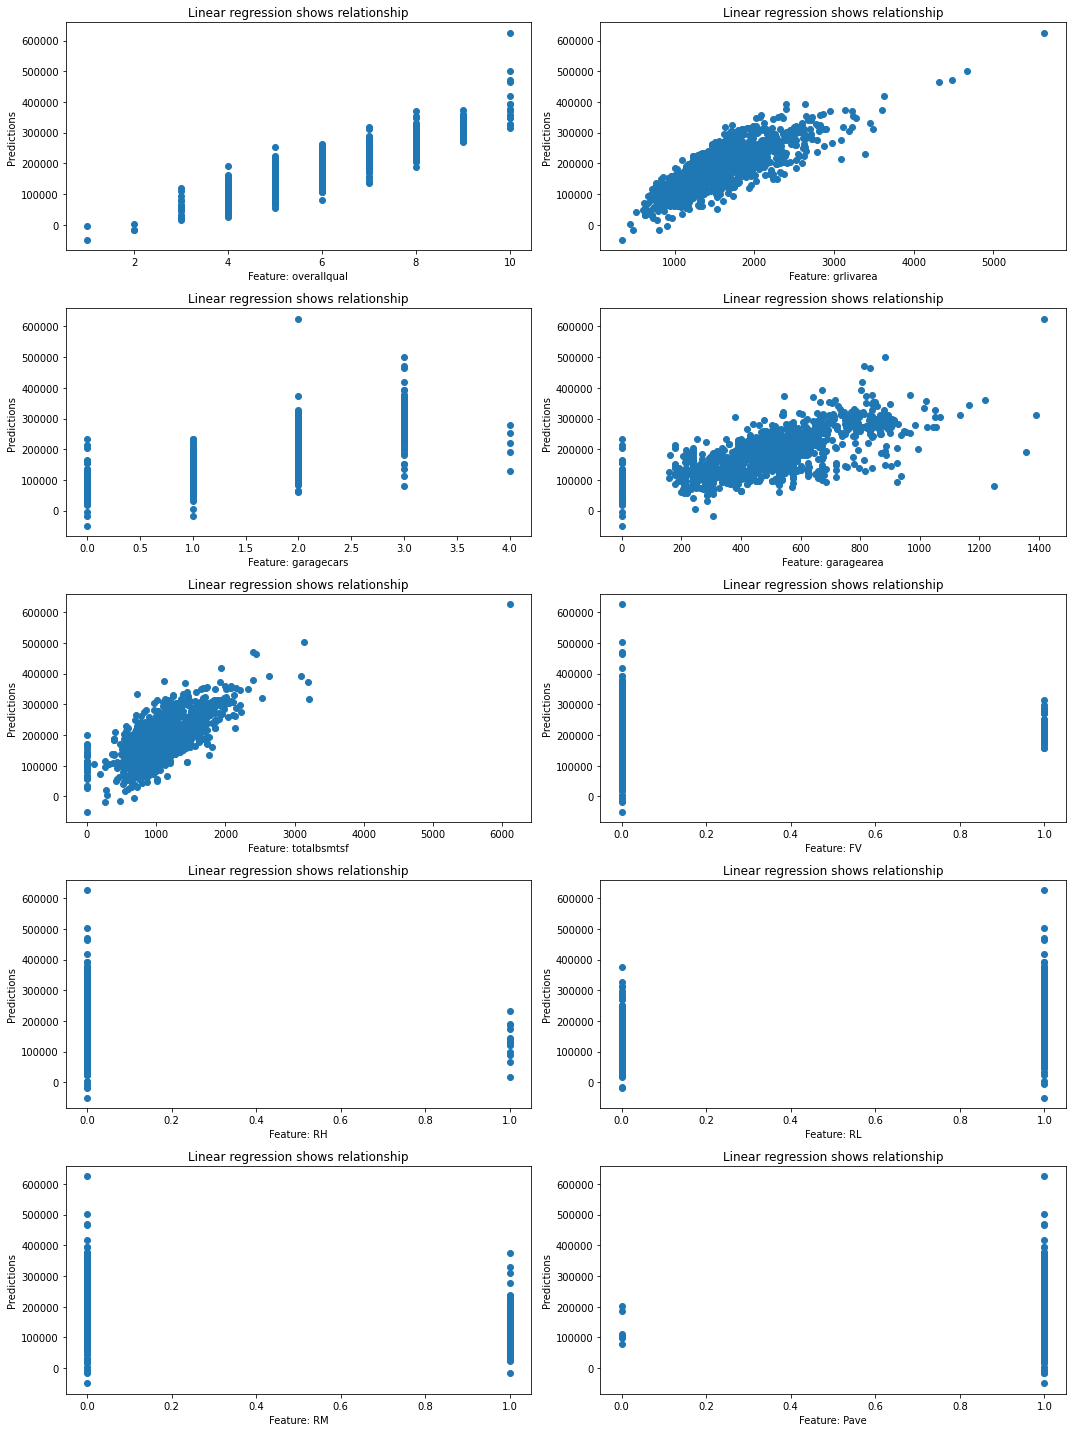

In [111]:
X = houseprice_data[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf', 'FV', 'RH','RL', 'RM', 'Pave' ]]
predictions = lrm_2.predict(X)

x = 1
plt.figure(figsize=(15,20))
for col in X:
  plt.subplot(5,2,x)
  plt.scatter(X[col], predictions)
  plt.xlabel('Feature: {}'.format(col))
  plt.ylabel('Predictions')
  plt.title('Linear regression shows relationship')
  plt.tight_layout()
  x = x + 1

In [113]:
# errors should be zero on average

error = Y - predictions
print('The average of the errors is {}'.format(np.mean(error)))

#average error is very close to zero


The average of the errors is 4.2579302640810404e-11


The bartlett stats are BartlettResult(statistic=497.7538525921925, pvalue=2.928793917007747e-110)
The levene stats are LeveneResult(statistic=491.9822037605606, pvalue=7.294345129826136e-101)


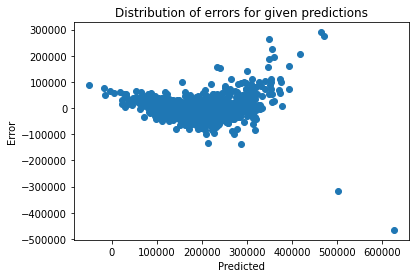

In [116]:
# Show homescedasticity (distribution of error terms is consistent ( not normal))
plt.scatter(predictions, error)
plt.xlabel('Predicted')
plt.ylabel('Error')
plt.title('Distribution of errors for given predictions')

bart_stats = bartlett(predictions, error)
lev_stats = levene(predictions, error)

print('The bartlett stats are {}'.format(bart_stats))
print('The levene stats are {}'.format(lev_stats))

#p-values are lower than .05 meaning that we reject null and error are heteroscedastic

In [118]:
# multicollinearlity should be low, features should have little to do with one another
X.corr()

#many of the features are correlated

,overallqual,grlivarea,garagecars,garagearea,totalbsmtsf,FV,RH,RL,RM,Pave
overallqual,1.000000,0.593007,0.600671,0.562022,0.537808,0.171854,-0.064666,0.126972,-0.195515,0.058823
grlivarea,0.593007,1.000000,0.467247,0.468997,0.454868,0.024275,-0.001070,0.132936,-0.154239,0.044121
garagecars,0.600671,0.467247,1.000000,0.882475,0.434585,0.102851,-0.090477,0.175167,-0.221834,-0.020025
garagearea,0.562022,0.468997,0.882475,1.000000,0.486665,0.114859,-0.073188,0.169593,-0.235580,-0.047794
totalbsmtsf,0.537808,0.454868,0.434585,0.486665,1.000000,-0.032689,-0.055128,0.257373,-0.247379,0.005068
FV,0.171854,0.024275,0.102851,0.114859,-0.032689,1.000000,-0.022722,-0.416608,-0.090435,0.013866
RH,-0.064666,-0.001070,-0.090477,-0.073188,-0.055128,-0.022722,1.000000,-0.203158,-0.044101,0.006762
RL,0.126972,0.132936,0.175167,0.169593,0.257373,-0.416608,-0.203158,1.000000,-0.808585,0.045348
RM,-0.195515,-0.154239,-0.221834,-0.235580,-0.247379,-0.090435,-0.044101,-0.808585,1.000000,-0.003127
Pave,0.058823,0.044121,-0.020025,-0.047794,0.005068,0.013866,0.006762,0.045348,-0.003127,1.000000


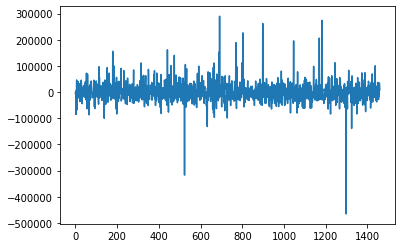

In [119]:
#error terms should be uncorrelated with one another
plt.plot(error)
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


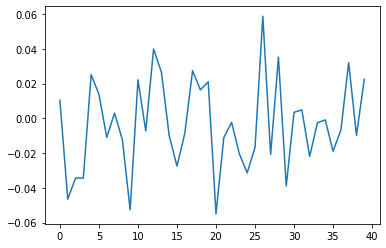

In [120]:
acf_data = acf(error)
plt.plot(acf_data[1:])
plt.show()

# after using acf (autocorrelation function) we see that the error terms are not linearly related